In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
amazon_data = pd.read_csv("/content/drive/MyDrive/ratings_Electronics (1).csv", names=["UserID","ProductID","Ratings","Timestamp"])
amazon_data.head(10)

,UserID,ProductID,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [7]:
Most_rated = pd.DataFrame(amazon_data.groupby("ProductID")["Ratings"].count())
Most_rated = Most_rated.sort_values(by="Ratings",ascending=False)
Most_rated

,Ratings
ProductID,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226
...,...
B004WL91KI,1
B004WL9FK4,1
B004WL9Q2Q,1


In [8]:
Most_rated.rename(columns={"Ratings":"Num Ratings"},inplace=True)
Most_rated["Ratings"] = pd.DataFrame(amazon_data.groupby("ProductID")["Ratings"].mean())
Most_rated.head()

,Num Ratings,Ratings
ProductID,,
B0074BW614,18244,4.491504
B00DR0PDNE,16454,3.931020
B007WTAJTO,14172,4.424005
B0019EHU8G,12285,4.754497
B006GWO5WK,12226,4.314657


In [24]:
products = [x for x in Most_rated["Num Ratings"].nlargest(47000).index]
products

['B0074BW614',
 'B00DR0PDNE',
 'B007WTAJTO',
 'B0019EHU8G',
 'B006GWO5WK',
 'B003ELYQGG',
 'B003ES5ZUU',
 'B007R5YDYA',
 'B00622AG6S',
 'B0002L5R78',
 'B008OHNZI0',
 'B003LR7ME6',
 'B000LRMS66',
 'B009SYZ8OC',
 'B00BGA9WK2',
 'B004QK7HI8',
 'B009A5204K',
 'B00BGGDVOO',
 'B0098F5W0Q',
 'B002MAPRYU',
 'B002WE6D44',
 'B005HMKKH4',
 'B0012S4APK',
 'B0052YFYFK',
 'B0001FTVEK',
 'B0044YU60M',
 'B00316263Y',
 'B000I68BD4',
 'B006ZP8UOW',
 'B0041Q38NU',
 'B005DOK8NW',
 'B002V88HFE',
 'B0027VT6V4',
 'B000S5Q9CA',
 'B009LL9VDG',
 'B003DZ165W',
 'B005FYNSPK',
 'B004GF8TIK',
 'B0015AARJI',
 'B001XURP7W',
 'B000VX6XL6',
 'B000BQ7GW8',
 'B0053NBLFW',
 'B007IV7KRU',
 'B0087NZ31S',
 'B004G6002M',
 'B005DKZTMG',
 'B0088LYCZC',
 'B007B31IAK',
 'B005X1Y7I2',
 'B000QUUFRW',
 'B004XC6GJ0',
 'B004OB0EBQ',
 'B003ZUIHY8',
 'B006OBGEHW',
 'B0057OCDQS',
 'B009USAJCC',
 'B0062IPIPQ',
 'B00BT7RAPG',
 'B00825BZUY',
 'B0038W0K2K',
 'B008AST7R6',
 'B006W8U2MU',
 'B007I5JT4S',
 'B007P4VOWC',
 'B004HHICKC',
 'B002QEBM

In [25]:
filt = amazon_data["ProductID"].isin(products)

In [26]:
df = amazon_data.loc[filt]
df = df.iloc[:100000,:]
df.tail()


,UserID,ProductID,Ratings,Timestamp
140076,A22SWGU68YFC6X,B0000659A7,5.0,1086652800
140077,A3HDRP3NQHWETU,B0000659A7,5.0,1091750400
140078,A3VIPHXKS310TX,B0000659A7,4.0,1046649600
140079,A2RB816IPP85LI,B0000659A7,5.0,1072483200
140080,A1RXDZ98LVYNRU,B0000659A7,5.0,1099958400


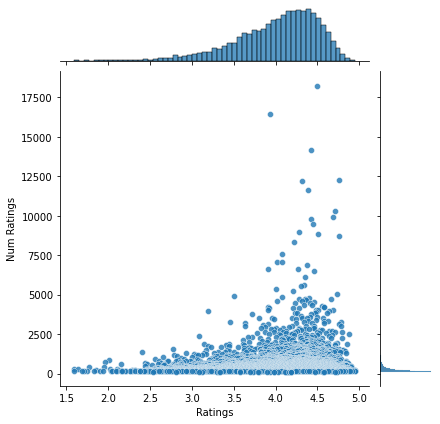

In [12]:
sns.jointplot(x="Ratings" ,y="Num Ratings" ,data=Most_rated.iloc[:10000,:],alpha=0.8)

In [27]:
pv = df.pivot_table(values="Ratings" ,index="UserID" ,columns="ProductID" ,fill_value=0)
pv.head()

ProductID,0528881469,0594481813,0972683275,1400501466,1400501474,1400501520,1400501741,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,1400699169,1615527613,161552763X,3744295508,6301977173,7214047977,7538637400,8862935293,8862935307,8866139874,8918010656,9573212900,9573212919,9575871979,9625993428,9888002198,9966338926,9966541551,9966569863,9966694544,9983891204,9983891212,9984984354,9984984362,9985511476,9985686764,...,B00006364I,B00006364O,B000063BGY,B000063CWO,B000063CWP,B000063D6E,B000063EJW,B000063EKE,B000063EKP,B000063ILB,B000063S4J,B000063SNE,B000063TJY,B000063TMH,B000063UZW,B000063V7N,B000063W8Z,B000063W93,B000063WP9,B000063WPA,B000063WQ0,B000063XJB,B000063Y73,B000063Y7E,B000063Y7F,B000063YA5,B00006412G,B000064184,B0000642RX,B0000645C8,B0000645C9,B0000645RH,B00006484F,B0000655XX,B0000658CD,B0000658CE,B0000658CG,B0000658CH,B0000658CI,B0000659A7
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A00625243BI8W1SSZNLMD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
A00995931BE16NG4F52QC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A01035471LBTPFWCOKAU2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
A014623426J5CM7M12MBW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [28]:
pv_basket = pv.applymap(lambda x:1 if x>=1 else 0)
pv_basket.head(20)

ProductID,0528881469,0594481813,0972683275,1400501466,1400501474,1400501520,1400501741,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,1400699169,1615527613,161552763X,3744295508,6301977173,7214047977,7538637400,8862935293,8862935307,8866139874,8918010656,9573212900,9573212919,9575871979,9625993428,9888002198,9966338926,9966541551,9966569863,9966694544,9983891204,9983891212,9984984354,9984984362,9985511476,9985686764,...,B00006364I,B00006364O,B000063BGY,B000063CWO,B000063CWP,B000063D6E,B000063EJW,B000063EKE,B000063EKP,B000063ILB,B000063S4J,B000063SNE,B000063TJY,B000063TMH,B000063UZW,B000063V7N,B000063W8Z,B000063W93,B000063WP9,B000063WPA,B000063WQ0,B000063XJB,B000063Y73,B000063Y7E,B000063Y7F,B000063YA5,B00006412G,B000064184,B0000642RX,B0000645C8,B0000645C9,B0000645RH,B00006484F,B0000655XX,B0000658CD,B0000658CE,B0000658CG,B0000658CH,B0000658CI,B0000659A7
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A00625243BI8W1SSZNLMD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
A00995931BE16NG4F52QC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A01035471LBTPFWCOKAU2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
A014623426J5CM7M12MBW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A02459613IS599WTHNWWS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
frequent_item = apriori(pv_basket,min_support=0.0001,use_colnames=True)
frequent_item

,support,itemsets
0,0.000293,(0528881469)
1,0.000337,(0594481813)
2,0.011411,(0972683275)
3,0.002714,(1400501466)
4,0.000315,(1400501474)
...,...,...
999,0.000163,"(B00005LE75, B00005LEN4)"
1000,0.000109,"(B00005Y3OM, B00005LEN4)"
1001,0.000109,"(B00005T406, B00005NIMJ)"
1002,0.000109,"(B00005T380, B00005T3N3)"


In [32]:
rules = association_rules(frequent_item, metric="lift",min_threshold=0.1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(B00004ZCJE),(B00004ZC8Y),0.027653,0.007817,0.001053,0.038084,4.871898,0.000837,1.031465
1,(B00004ZC8Y),(B00004ZCJE),0.007817,0.027653,0.001053,0.134722,4.871898,0.000837,1.123740
